In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [3]:
x = ["which book is this", "this is book and this is math"]

## BOW

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [5]:
bow = pd.DataFrame(data = count.toarray(), columns = cv.get_feature_names())

In [6]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


## TF

In [7]:
tf = bow.copy()

In [8]:
for j,i in tf.iterrows():
    
    if j == 0:
        
        print(i)

and      0
book     1
is       1
math     0
this     1
which    1
Name: 0, dtype: int64


In [9]:
for index,rows in enumerate(tf.iterrows()):

    for col in rows[1].index:
        
        tf.loc[index,col] = tf.loc[index,col] / (rows[1].sum())

In [10]:
tf.head()

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


## IDF

In [11]:
idf = bow.copy().astype(bool)
idf

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [12]:
idf_list = []

for col in idf.columns:
    
    idf_list.append(idf[col].sum())
    
idf_list

[1, 2, 2, 1, 2, 1]

In [13]:
N = len(x)

idf_values = []

for index, rows in enumerate(idf.columns):
    
    values = 1 + np.log( (N + 1) / (idf_list[index] + 1) )
    idf_values.append(values)

pd.DataFrame(data = np.array(idf_values).reshape(1,-1), columns = idf.columns, index = ["idf"])

,and,book,is,math,this,which
idf,1.405465,1.0,1.0,1.405465,1.0,1.405465


## TF*IDF

In [14]:
tfidf = tf.copy()
tfidf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


In [15]:
for index,col in enumerate(tfidf.columns):
    
    tfidf[col] = tfidf[col] * idf_values[index]

tfidf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.351366
1,0.200781,0.142857,0.285714,0.200781,0.285714,0.000000


## L2 NORM

In [16]:
l2_list = []

for index,rows in enumerate(tfidf.iterrows()):
        
    l2_list.append(np.sqrt((rows[1] ** 2).sum()))

l2_list

[0.557636315739787, 0.5141004495712556]

## TF-IDF Final

In [17]:
tfidf_final = tfidf.copy()
tfidf_final

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.351366
1,0.200781,0.142857,0.285714,0.200781,0.285714,0.000000


In [18]:
for index,rows in enumerate(tfidf_final.iterrows()):

    for col in rows[1].index:
        
        tfidf_final.loc[index,col] = tfidf_final.loc[index,col] / l2_list[index]
        
tfidf_final

,and,book,is,math,this,which
0,0.000000,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.390548,0.277878,0.555756,0.390548,0.555756,0.000000


---

## Sklearn Kütüphanesi Sayesinde

In [19]:
simple_tfidf = TfidfVectorizer()
tfidf_count = simple_tfidf.fit_transform(x)

tfidf_data = pd.DataFrame(data = tfidf_count.toarray(), columns = simple_tfidf.get_feature_names())
tfidf_data

,and,book,is,math,this,which
0,0.000000,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.390548,0.277878,0.555756,0.390548,0.555756,0.000000


In [20]:
tfidf_final

,and,book,is,math,this,which
0,0.000000,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.390548,0.277878,0.555756,0.390548,0.555756,0.000000


## Load Spam DataSet

In [21]:
path = "/Users/gokhanersoz/Desktop/Hepsi/NLP/Data/spam.tsv"

df = pd.read_csv(path,sep = "\t")

df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [22]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [23]:
ham = df[df["label"] == "ham"]
spam = df[df["label"] == "spam"]

df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

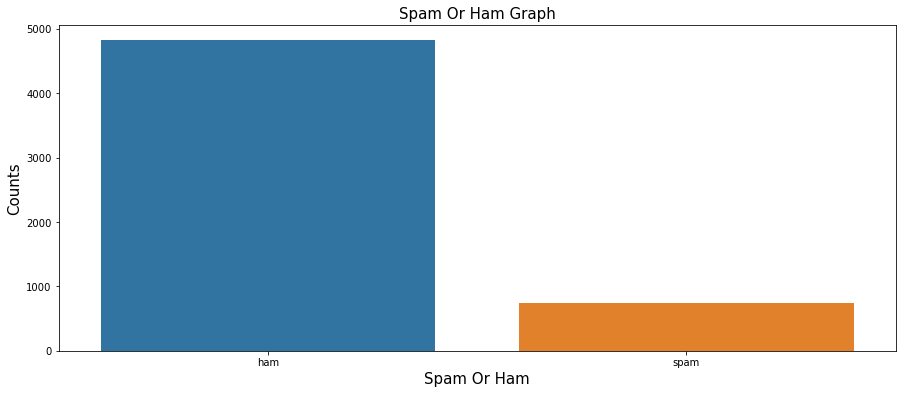

In [24]:
plt.figure(figsize = (15,6))
sns.barplot(x = "index", y = "label", data = df["label"].value_counts().reset_index())

size = 15
plt.title("Spam Or Ham Graph", fontsize = size)
plt.xlabel("Spam Or Ham", fontsize = size)
plt.ylabel("Counts", fontsize = size)
plt.show()

In [25]:
print("Ham Shape : {}".format(ham.shape))
print("Spam Shape : {}".format(spam.shape))

Ham Shape : (4825, 4)
Spam Shape : (747, 4)


In [26]:
ham = ham.sample(spam.shape[0])

print("Ham Shape : {}".format(ham.shape))
print("Spam Shape : {}".format(spam.shape))

Ham Shape : (747, 4)
Spam Shape : (747, 4)


In [27]:
data = ham.append(spam)
print("DataFrame Shape : {}".format(data.shape))

DataFrame Shape : (1494, 4)


In [28]:
data.head()

,label,message,length,punct
4783,ham,"Call me, i am senthil from hsbc.",32,2
1587,ham,There are no other charges after transfer char...,86,0
3034,ham,"Aight, lemme know what's up",27,2
498,ham,Some of them told accenture is not confirm. Is...,55,2
204,ham,Goodmorning sleeping ga.,24,1


In [29]:
data["label"].value_counts()

ham     747
spam    747
Name: label, dtype: int64

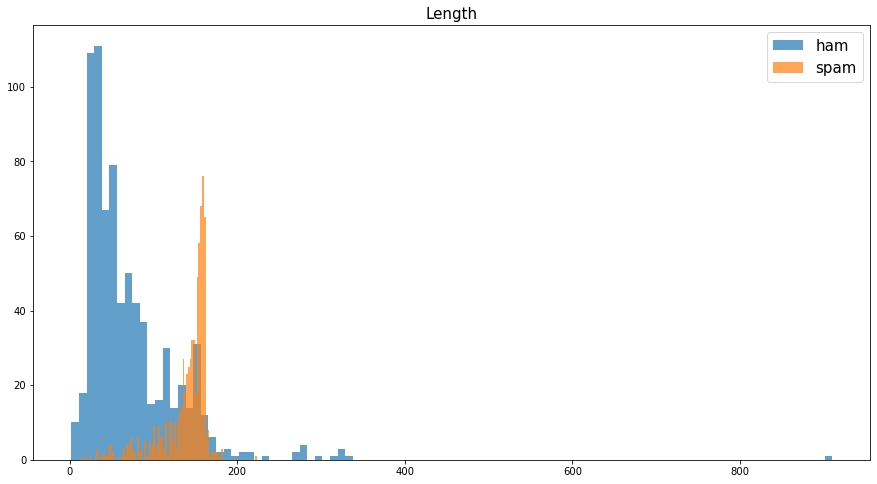

In [30]:
plt.figure(figsize = (15,8))

plt.hist(ham["length"] , bins = 100, alpha = 0.7 , label = "ham",)
plt.hist(spam["length"], bins = 100, alpha = 0.7, label = "spam")

size = 15
plt.legend(loc = "best", fontsize = size)
plt.title("Length" , fontsize =size)
plt.show()

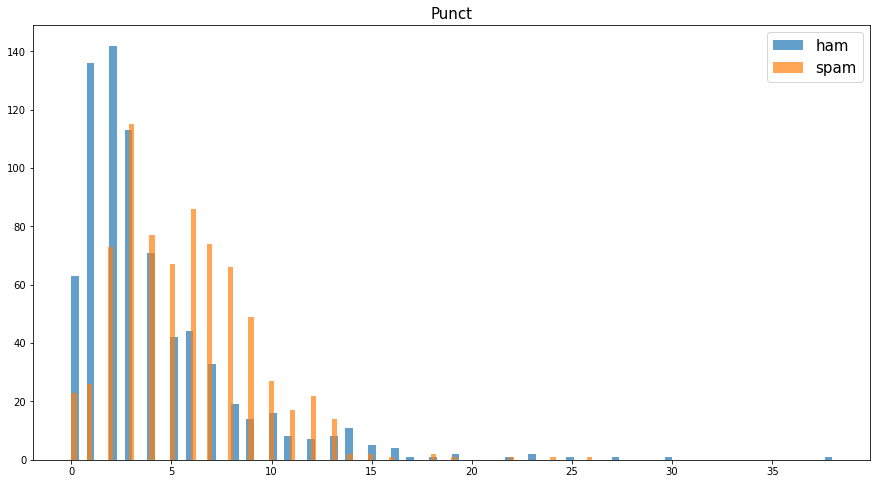

In [31]:
plt.figure(figsize = (15,8))

plt.hist(ham["punct"] , bins = 100, alpha = 0.7 , label = "ham",)
plt.hist(spam["punct"], bins = 100, alpha = 0.7, label = "spam")

size = 15
plt.legend(loc = "best", fontsize = size)
plt.title("Punct" , fontsize =size)
plt.show()

## Data PreParation For Training 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [34]:
data.head()

,label,message,length,punct
4783,ham,"Call me, i am senthil from hsbc.",32,2
1587,ham,There are no other charges after transfer char...,86,0
3034,ham,"Aight, lemme know what's up",27,2
498,ham,Some of them told accenture is not confirm. Is...,55,2
204,ham,Goodmorning sleeping ga.,24,1


In [35]:
cv = CountVectorizer()
count = cv.fit_transform(data["message"])

bow = pd.DataFrame(data = count.toarray(), columns = cv.get_feature_names())
bow.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,yun,yunny,yuo,yup,zebra,zed,zoe,zouk,èn,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
tf_idf = TfidfVectorizer()
tfidf_count = tf_idf.fit_transform(data["message"])

tfidf = pd.DataFrame(data = tfidf_count.toarray(), columns = tf_idf.get_feature_names())
tfidf.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,yun,yunny,yuo,yup,zebra,zed,zoe,zouk,èn,ú1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X = tfidf_count
y = data["label"]

X.shape, y.shape

((1494, 4613), (1494,))

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y , random_state = 0, stratify = y, test_size = 0.2)

In [39]:
X_train.shape, y_train.shape

((1195, 4613), (1195,))

## Training Your First Text Classifiers

## RandomForest

In [40]:
from sklearn.tree import tree, plot_tree,export_graphviz

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train,y_train)

/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


RandomForestClassifier(n_jobs=-1)

In [41]:
#plt.figure(figsize = (15,8 ))
#plot_tree(clf.estimators_[2],feature_names = tf_idf.get_feature_names(), class_names = y.unique(),
#         filled=True, impurity=True, rounded= True)

#plt.show()

In [42]:
y_pred = clf.predict(X_test)
y_pred[:10]

array(['ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam',
       'ham'], dtype=object)

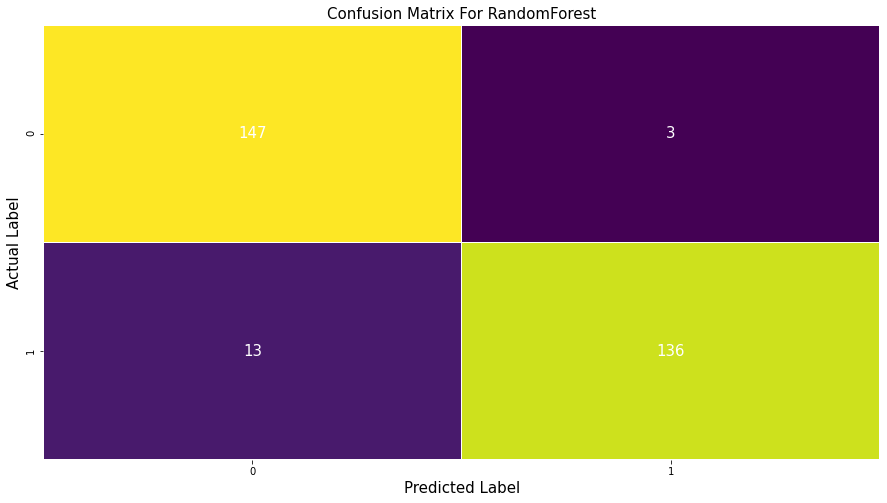

In [43]:
plt.figure(figsize = (15,8))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, annot_kws = {"size" : 15, "color" : "white"}, cbar = False, 
            cmap = "viridis",fmt = "d",linecolor="white",linewidths=0.5,
            xticklabels=[0,1],yticklabels=[0,1])

size = 15
plt.title("Confusion Matrix For RandomForest", fontsize = size)
plt.ylabel("Actual Label", fontsize = size)
plt.xlabel("Predicted Label", fontsize = size)
plt.show()

## SVC

In [44]:
svc = SVC(C = 1000, gamma = "auto")
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

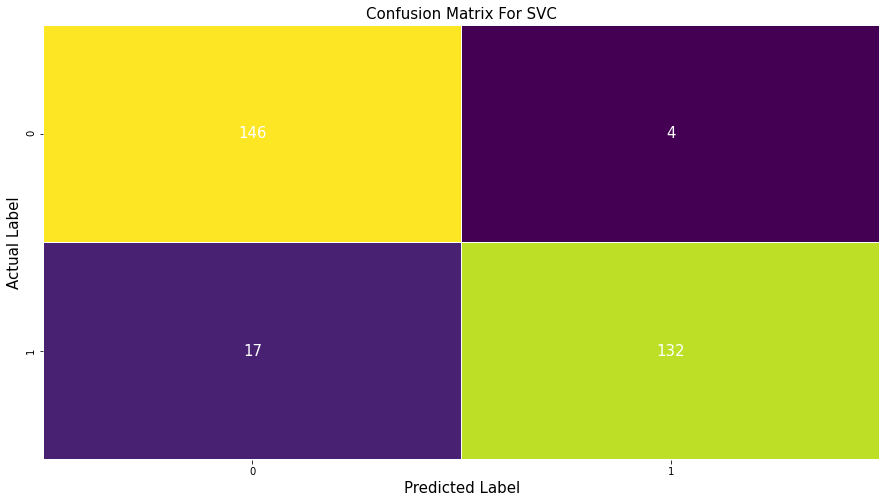

In [45]:
plt.figure(figsize = (15,8))
cm = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(cm, annot = True, annot_kws = {"size" : 15, "color" : "white"}, cbar = False, 
            cmap = "viridis",fmt = "d",linecolor="white",linewidths=0.5,
            xticklabels=[0,1],yticklabels=[0,1])

size = 15
plt.title("Confusion Matrix For SVC", fontsize = size)
plt.ylabel("Actual Label", fontsize = size)
plt.xlabel("Predicted Label", fontsize = size)
plt.show()

## Test Model With Real Data

In [46]:
def predict(words):
    
    pred_words = tf_idf.transform([words])
    pred_words = pred_words.toarray()
    pred = clf.predict(pred_words)
    
    return pred

In [47]:
predict("hey, whassup")

array(['ham'], dtype=object)

In [48]:
predict("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

array(['spam'], dtype=object)